In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_file(filepath):
    """
    Reads in the file and returns a dataframe.
    The columns of the data are ['IMEI', 'label', 'timestamp', 'accelerator_x', 'accelerator_y', 'accelerator_z', 'gyroscope_x', 'gyroscoper_y', 'gyroscope_z', 'win_label'].
    """
    df = pd.read_csv(filepath, sep ='\t', names=['IMEI', 'label', 'timestamp', 
                                                 'accelerator_x', 'accelerator_y', 'accelerator_z', 
                                                 'gyroscope_x', 'gyroscoper_y', 'gyroscope_z',
                                                 'win_label'], dtype={'IMEI': str})
    # notice - disabled to save time
    # df.index = pd.Series([pd.to_datetime(date) for date in df.index])  # convert to timestamps,
    return df

In [3]:
def reshape_window(df):
    """
    Since the input windows are sliding windows. Take every other window.
    """
    skip = 64  # window length

    idx = np.array(range(len(df)))
    idx = idx.reshape([-1, 64])
    idx = idx[range(0, len(idx), 2)]
    idx = idx.reshape(-1,)
    
    return df.iloc[idx]  

In [4]:
sedentary = load_file(r'C:\Users\ycg3\Desktop\data_for_analysis\sedentary_train_1')
incar = load_file(r'C:\Users\ycg3\Desktop\data_for_analysis\incar_train_1')
walking = load_file(r'C:\Users\ycg3\Desktop\data_for_analysis\walk_train_new')
running = load_file(r'C:\Users\ycg3\Desktop\data_for_analysis\run_train_1')
intrain = load_file(r'C:\Users\ycg3\Desktop\data_for_analysis\intrain_train')
biking = load_file(r'C:\Users\ycg3\Desktop\data_for_analysis\biking_train')

In [5]:
sedentary = reshape_window(sedentary)
incar = reshape_window(incar)
walking = reshape_window(walking)
running = reshape_window(running)
intrain = reshape_window(intrain)
biking = reshape_window(biking)

In [6]:
amp_sedentary = np.sqrt(sedentary['accelerator_x'] ** 2 + sedentary['accelerator_y'] ** 2) * np.sign(sedentary['accelerator_z'])
amp_incar = np.sqrt(incar['accelerator_x'] ** 2 + incar['accelerator_y'] ** 2) * np.sign(incar['accelerator_z'])
amp_walking = np.sqrt(walking['accelerator_x'] ** 2 + walking['accelerator_y'] ** 2) * np.sign(walking['accelerator_z'])
amp_running = np.sqrt(running['accelerator_x'] ** 2 + running['accelerator_y'] ** 2) * np.sign(running['accelerator_z'])
amp_intrain = np.sqrt(intrain['accelerator_x'] ** 2 + intrain['accelerator_y'] ** 2) * np.sign(intrain['accelerator_z'])
amp_biking = np.sqrt(biking['accelerator_x'] ** 2 + biking['accelerator_y'] ** 2) * np.sign(biking['accelerator_z'])

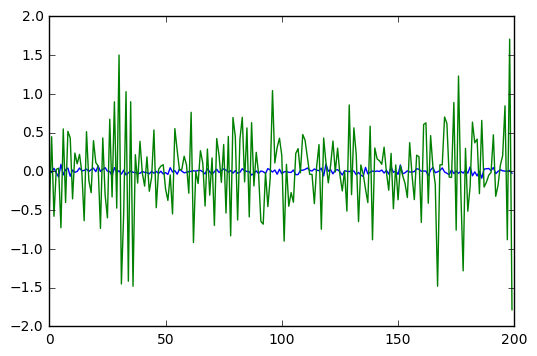

In [43]:
plt.plot((sedentary['accelerator_z'])[13000:13200].values)
#plt.plot(amp_sedentary[13000:13200].values)
plt.plot((incar['accelerator_z'])[1000:1200].values)
plt.show()

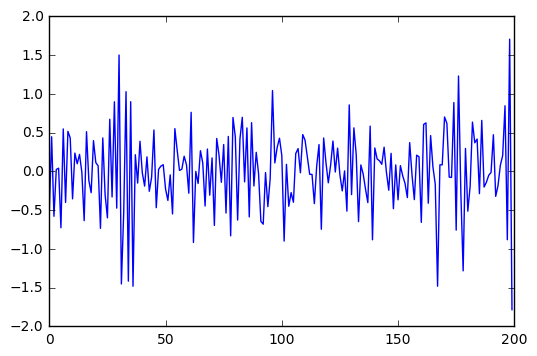

In [41]:
plt.plot((incar['accelerator_z'])[1000:1200].values)
#plt.plot(amp_incar[1000:1200].values)
plt.show()

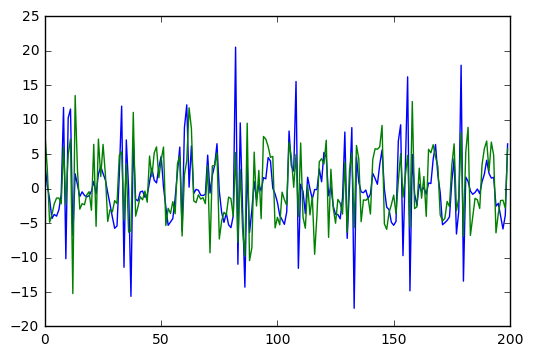

In [33]:
plt.plot((walking['accelerator_z'])[1200:1400].values)
plt.plot(amp_walking[1200:1400].values)
plt.show()

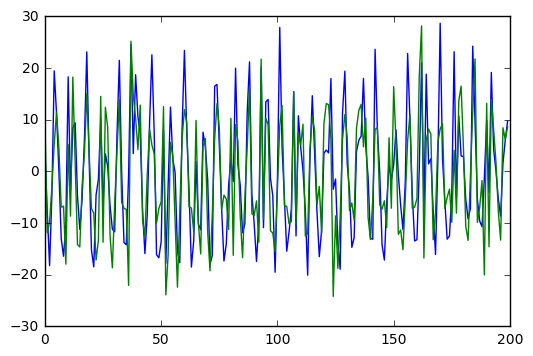

In [24]:
plt.plot((running['accelerator_z'])[1200:1400].values)
plt.plot(amp_running[1200:1400].values)
plt.show()

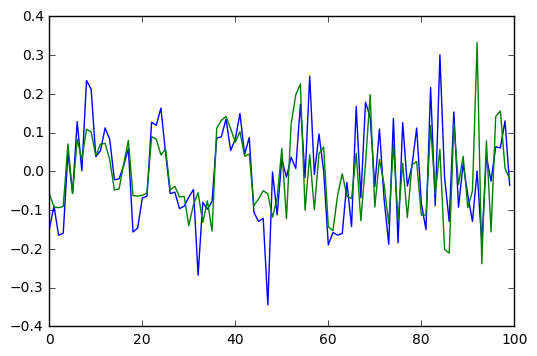

In [27]:
plt.plot((intrain['accelerator_z'])[20000:20100].values)
plt.plot(amp_intrain[20000:20100].values)
plt.show()

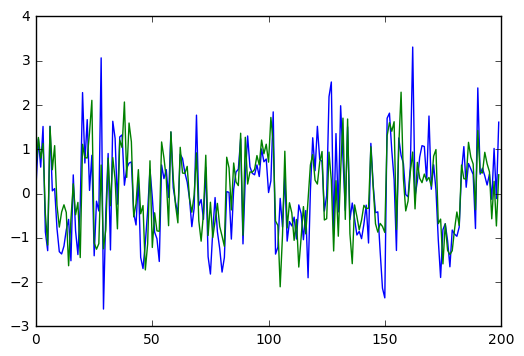

In [29]:
plt.plot((biking['accelerator_z'])[20000:20200].values)
plt.plot(amp_biking[20000:20200].values)
plt.show()

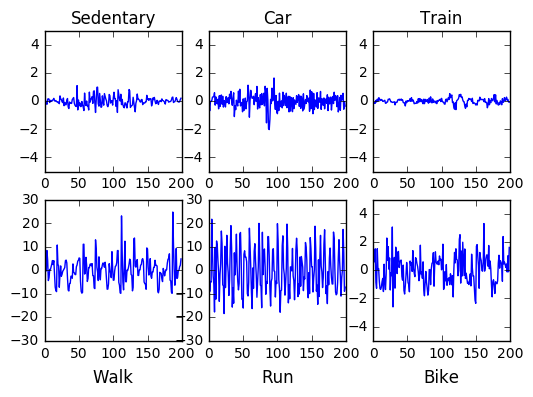

In [46]:
plt.subplot("231")
plt.plot((sedentary['accelerator_z'])[20000:20200].values)
plt.title("Sedentary")
plt.ylim([-5,5])

plt.subplot("232")
plt.plot((incar['accelerator_z'])[20000:20200].values)
plt.title("Car")
plt.ylim([-5,5])

plt.subplot("233")
plt.plot((intrain['accelerator_z'])[20000:20200].values)
plt.title("Train")
plt.ylim([-5,5])

plt.subplot("234")
plt.plot((walking['accelerator_z'])[20000:20200].values)
plt.title("Walk", y=-0.35)
plt.ylim([-30,30])

plt.subplot("235")
plt.plot((running['accelerator_z'])[20000:20200].values)
plt.title("Run", y=-0.35)
plt.ylim([-30,30])

plt.subplot("236")
plt.plot((biking['accelerator_z'])[20000:20200].values)
plt.title("Bike", y=-0.35)
plt.ylim([-5,5])

plt.savefig('Zwave.png', format='png', dpi=300)
plt.show()
